In [1]:
import pyscf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_fci_H2(r):
    mol = pyscf.M(
        atom = f'Li 0 0 0; H 0 0 {r}',  # in Angstrom
        basis = 'sto-3g',
        symmetry = True,
    )
    myhf = mol.RHF().run()

    #
    # create an FCI solver based on the SCF object
    #
    cisolver = pyscf.fci.FCI(myhf)
    print('E(FCI) = %.12f' % cisolver.kernel()[0])
    return cisolver.kernel()[0]

In [3]:
E_1547 = calc_fci_H2(1.547)

/home/azhar04/anaconda3/envs/quantum-dev/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -7.86311961642149
E(FCI) = -7.882762193344


In [4]:
r_array = np.arange(0.5, 5.0, 0.25)
r_array

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

In [5]:
E_R = []
# Data = []
for i in range(len(r_array)):
    E = calc_fci_H2(r_array[i])
    # Data.append(E)
    E_R.append(E)

converged SCF energy = -7.02841009454193
E(FCI) = -7.050225035300
converged SCF energy = -7.55672166024679
E(FCI) = -7.575486719856
converged SCF energy = -7.76736213574856
E(FCI) = -7.784460280031
converged SCF energy = -7.84490531557397
E(FCI) = -7.861861440548
converged SCF energy = -7.86335762153512
E(FCI) = -7.882362286799
converged SCF energy = -7.85383960184052
E(FCI) = -7.877187002305
converged SCF energy = -7.83090558463708
E(FCI) = -7.861087772481
converged SCF energy = -7.80193895704871
E(FCI) = -7.841817859457
converged SCF energy = -7.7708736692219
E(FCI) = -7.823723883468
converged SCF energy = -7.74000074001332
E(FCI) = -7.809162297675
converged SCF energy = -7.71082990021723
E(FCI) = -7.798843159502
converged SCF energy = -7.68437642306796
E(FCI) = -7.792184472005
converged SCF energy = -7.66120160151512
E(FCI) = -7.788115123279
converged SCF energy = -7.64145386532506
E(FCI) = -7.785695170102
converged SCF energy = -7.62497563013133
E(FCI) = -7.784278178715
converged S

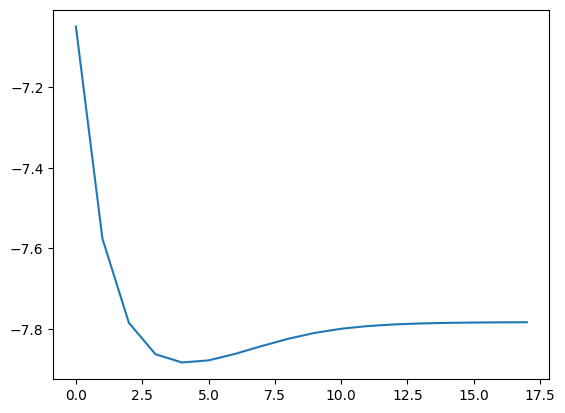

In [6]:
plt.plot(E_R)

In [ ]:
fci_data_LiH = np.column_stack((r_array, E_R))
file_name = 'fci_data_LiH.txt'
np.savetxt(file_name, fci_data_LiH, delimiter=',', header='r_array, E_R', comments='')